In [1]:
#import the necessary packages
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/spam.csv', encoding='ansi')
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


## Data Cleaning

In [3]:
#remove the unnamed column
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
#rename the columns
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)
df.head(2)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [5]:
df['label'] = (df['label'] == 'spam').astype(int)
df.sample(5)

,label,text
4114,0,Sorry. You never hear unless you book it. One ...
3710,0,"Sorry pa, i dont knw who ru pa?"
2041,0,ÌÏ dun wan to watch infernal affair?
1820,0,I'll probably be by tomorrow (or even later to...
1275,0,Wot u up 2 u weirdo?


In [6]:
#count duplicates
df.duplicated().sum()

403

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## EDA

In [8]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.value_counts('label')

label
0    4516
1     653
Name: count, dtype: int64

In [11]:
#plot the distribution of the labels using pie chart
import matplotlib.pyplot as plt

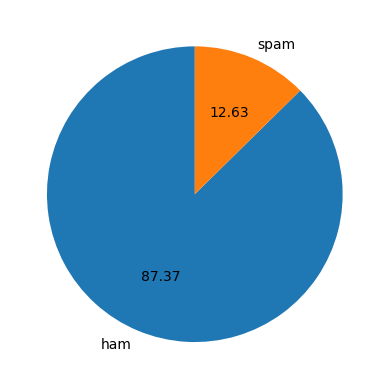

In [15]:
plt.pie(df.value_counts('label'), labels=['ham', 'spam'], autopct='%0.2f', startangle=90)
plt.show()

In [24]:
#install nltk and punkt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhinav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len)
df.head()

,label,text,num+_characters,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61


In [27]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
import seaborn as sns

In [30]:
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

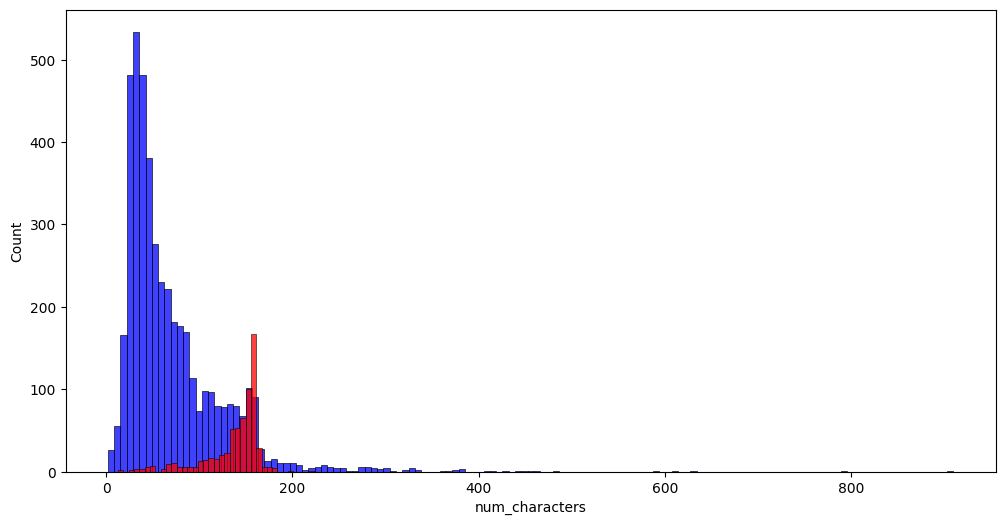

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_characters'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_characters'], color='red', label='Spam')

<Axes: xlabel='num_words', ylabel='Count'>

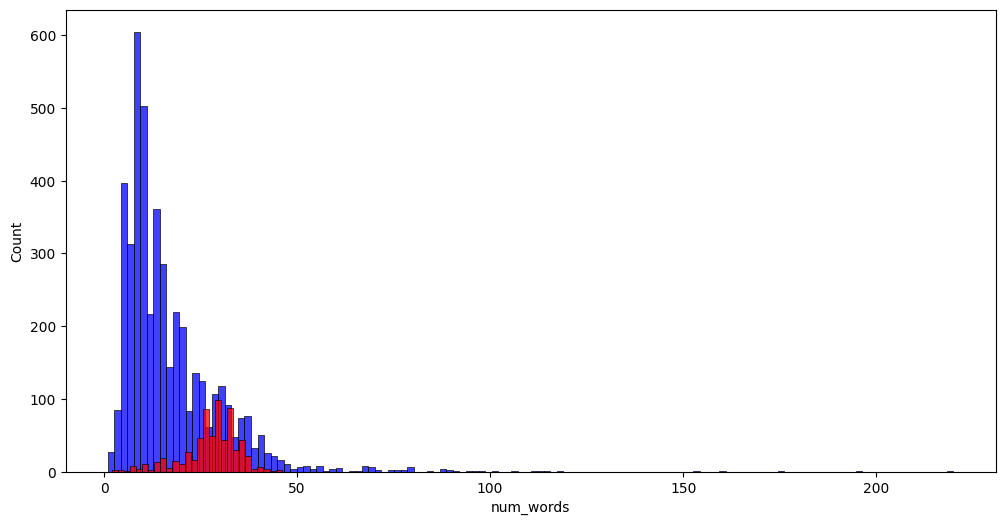

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_words'], color='red', label='Spam')

<Axes: xlabel='num_sentences', ylabel='Count'>

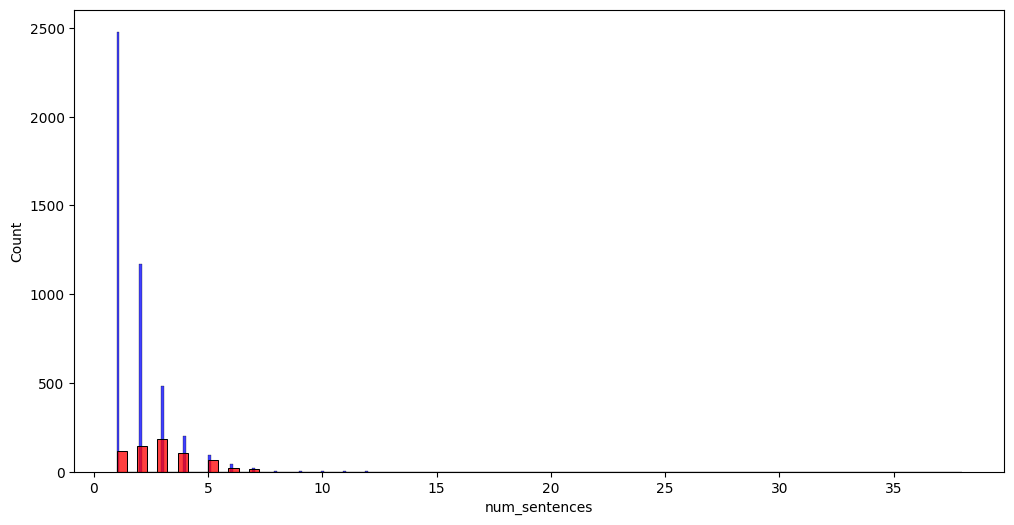

In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_sentences'], color='blue', label='Ham')
sns.histplot(df[df['label'] == 1]['num_sentences'], color='red', label='Spam')

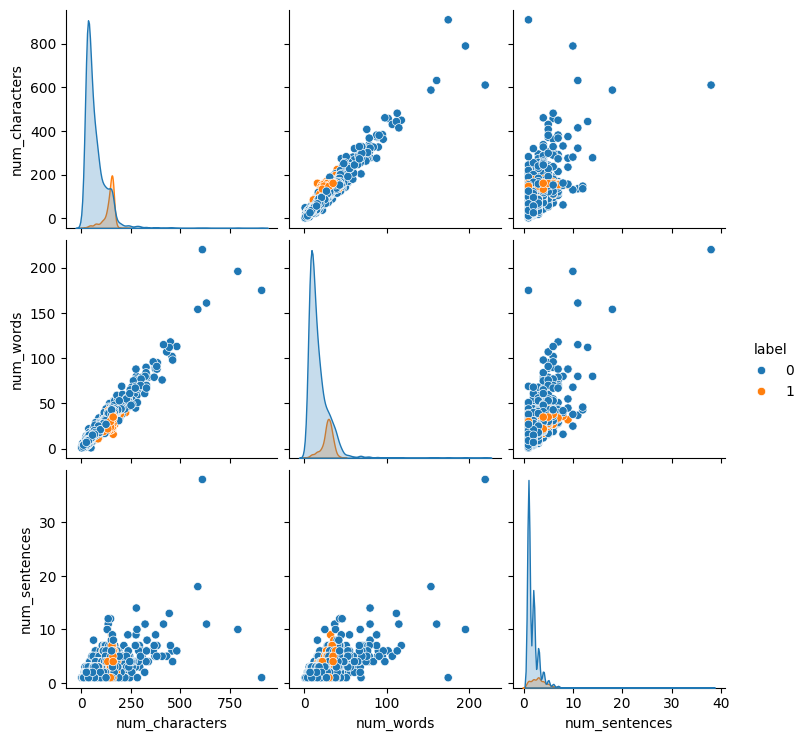

In [37]:
sns.pairplot(df, hue='label', vars=['num_characters', 'num_words', 'num_sentences'])

In [43]:
df[['label', 'num_characters', 'num_words', 'num_sentences']].corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

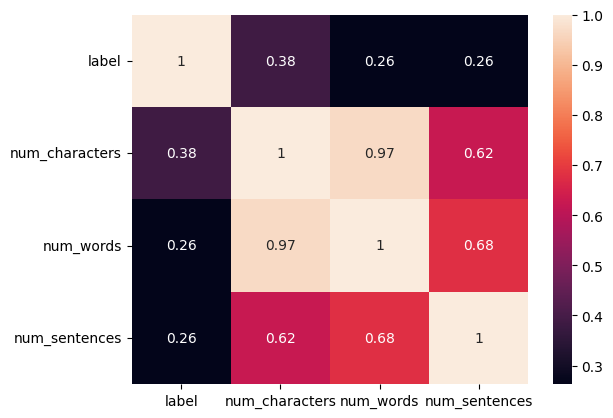

In [44]:
sns.heatmap(df[['label', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)